<a href="https://colab.research.google.com/github/gmxavier/FAT0413150/blob/main/notebooks/04.01-Marlin-Ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Setup
!pip install slycot   # optional
!pip install control
from control.matlab import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

     |████████████████████████████████| 1.6MB 8.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp37-cp37m-linux_x86_64.whl size=1417832 sha256=cff094dfd288133ab18917cfa5f5d7eb057632736f3d08cac4ceb6b8cc57ba13
  Stored in directory: /root/.cache/pip/wheels/a2/46/56/f82cbb2fd06556f4f3952a2eb2396e8fd29264fffecbaad3cf
Successfully built slycot
     |████████████████████████████████| 348kB 7.4MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344920 sha256=a13dacaf8458dd280ed84dbdad2d4c1531450ab1a0497ec517373ffa7ffc760a
  Stored in directory: /root/.cache/pip/wheels/35/be/ee/081b68ca3e4b2d253fba2f7f7e51960373903fb7b6d13c5532
Successfully built control


/usr/local/lib/python3.7/dist-packages/control/timeresp.py:1149: UserWarning: System has direct feedthrough: ``D != 0``. The infinite impulse at ``t=0`` does not appear in the output.
Results may be meaningless!
  warnings.warn("System has direct feedthrough: ``D != 0``. The "


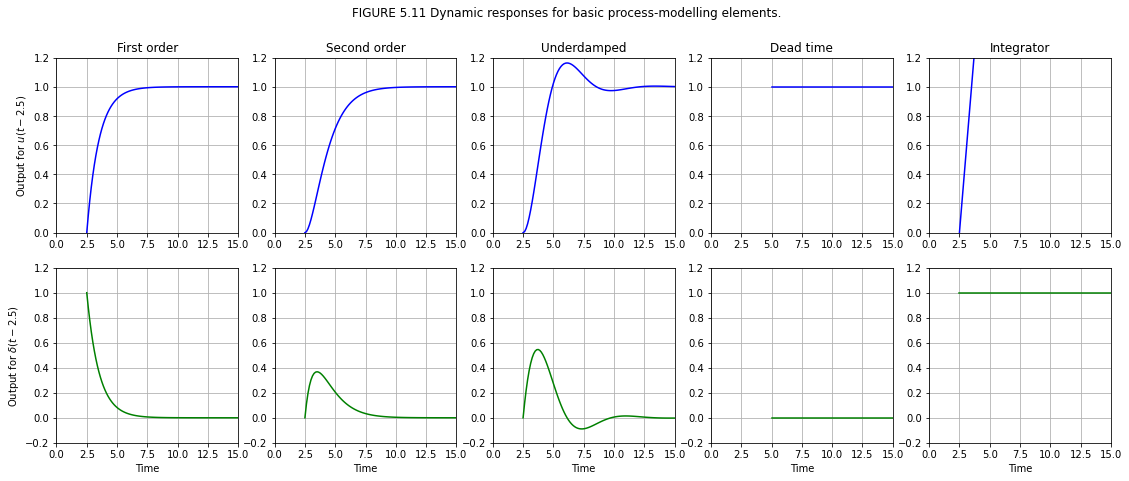

In [3]:
# Reproducing Figure 5.1 (Marlin, Chapter 5)

# Defining the transfer functions denominators
names = ['First order', 'Second order', 'Underdamped', 'Dead time', 'Integrator']
fo = [1, 1]    # First order system
so = [1, 2, 1] # Second order system
ud = [1, 1, 1] # Underdamped (second order)
dt = [0, 1]    # Dead time (as Pade approximation)
rp = [1, 0]    # Integrator (ramp)

# Generating the outputs
tinf = 12.5
td = 2.5
time = linspace(0, tinf, 101)
out_step = []
for sys in [fo, so, ud, dt, rp]:
  out, _ = step(tf(1, sys), time)
  out_step.append([time, out])
imp_step = []
for sys in [fo, so, ud, dt, rp]:
  out, _ = impulse(tf(1, sys), time)
  imp_step.append([time, out])

# Plotting
plt.close('all')
fig_width_cm = 48
fig_height_cm = 18
plt.figure(1, figsize =(fig_width_cm /2.54, fig_height_cm /2.54))

for k, out in enumerate(out_step):
  plt.subplot(2, 5, k+1)
  if k+1==4:
    plt.plot(out[0]+2*td, out[1], 'blue')
  else:
    plt.plot(out[0]+td, out[1], 'blue')
  plt.grid()
  plt.xlim([0, tinf+td])
  plt.ylim([0, 1.2])
  plt.title(names[k])
  if k+1 == 1:
    plt.ylabel('Output for $u(t-2.5)$')

plt.suptitle('FIGURE 5.11 Dynamic responses for basic process-modelling elements.')

for k, out in enumerate(imp_step):
  plt.subplot(2, 5, k+6)
  if k+6==9:
    plt.plot(out[0]+2*td, out[1], 'green')
  else:
    plt.plot(out[0]+td, out[1], 'green')
  plt.grid()
  plt.xlabel('Time')
  plt.xlim([0, tinf+td])
  plt.ylim([-0.2, 1.2])
  if k+1 == 1:
    plt.ylabel('Output for $\delta(t-2.5)$')

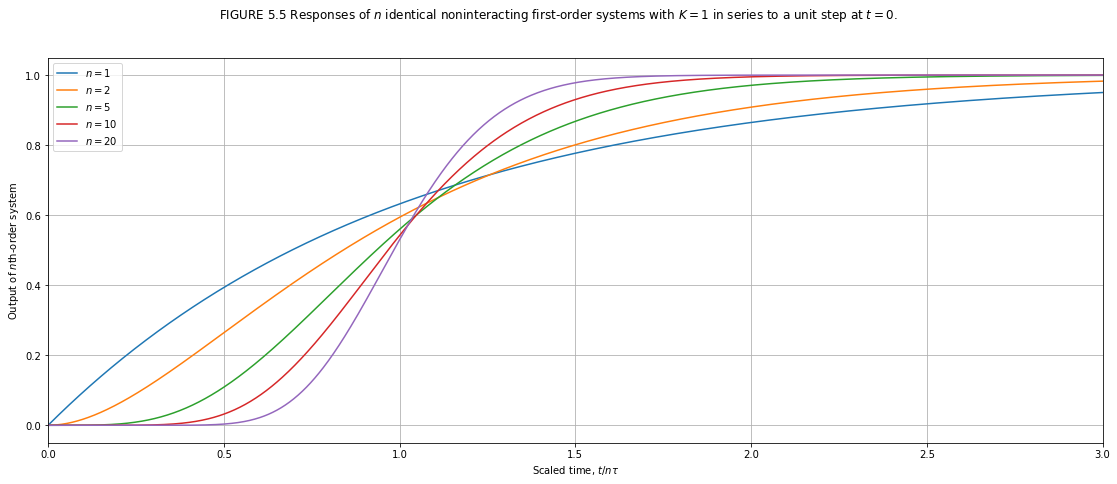

In [5]:
# Reproducing Figure 5.5 (Marlin, Chapter 5)

# Generating the outputs
ns = [1, 2, 5, 10, 20]
tau = 1
tinf = 3*tau
out_step = []
for n in ns:
  time = linspace(0, tinf*n, 1001)
  sys = tf(1, [tau, 1])**n
  out, _ = step(sys, time)
  out_step.append([time, out])

# Plotting
plt.close('all')
fig_width_cm = 48
fig_height_cm = 18
plt.figure(1, figsize =(fig_width_cm /2.54, fig_height_cm /2.54))

plt.suptitle('FIGURE 5.5 Responses of $n$ identical noninteracting first-order systems with $K=1$ in series to a unit step at $t=0$.')

for k, out in enumerate(out_step):
  plt.plot(out[0]/(ns[k]*tau), out[1])

plt.grid()
plt.xlim([0, tinf])
plt.xlabel('Scaled time, $t/ {n \\tau}$')
plt.ylabel('Output of $n$th-order system')
plt.legend(labels=['$n={}$'.format(n) for n in ns])

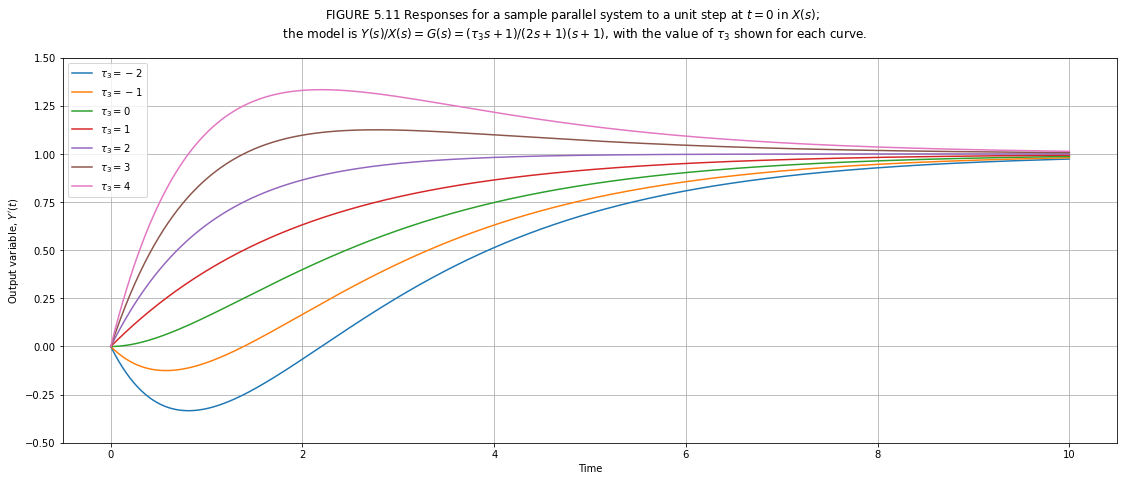

In [9]:
# Reproducing Figure 5.11 (Marlin, Chapter 5)

# Generating the outputs
tau3s = range(-2, 5)
tinf = 10
time = linspace(0, tinf, 1001)
out_step = []
for tau3 in tau3s:
  sys1 = tf([tau3, 1], [2, 1])
  sys2 = tf(1, [1, 1])
  sys  = series(sys1, sys2)
  out, _ = step(sys, time)
  out_step.append([time, out])

# Plotting
plt.close('all')
fig_width_cm = 48
fig_height_cm = 18
plt.figure(1, figsize =(fig_width_cm /2.54, fig_height_cm /2.54))

plt.suptitle('FIGURE 5.11 Responses for a sample parallel system to a unit step at $t=0$ in $X(s)$;\n the model is $Y(s)/X(s) = G(s) = (\\tau_{3}s + 1)/(2s + 1)(s + 1)$, with the value of $\\tau_{3}$ shown for each curve.')

for k, out in enumerate(out_step):
  plt.plot(out[0], out[1])

plt.grid()
plt.ylim([-0.5, 1.5])
plt.xlabel('Time')
plt.ylabel('Output variable, $Y\'(t)$')
plt.legend(labels=['$\\tau_3 ={}$'.format(tau3) for tau3 in tau3s])

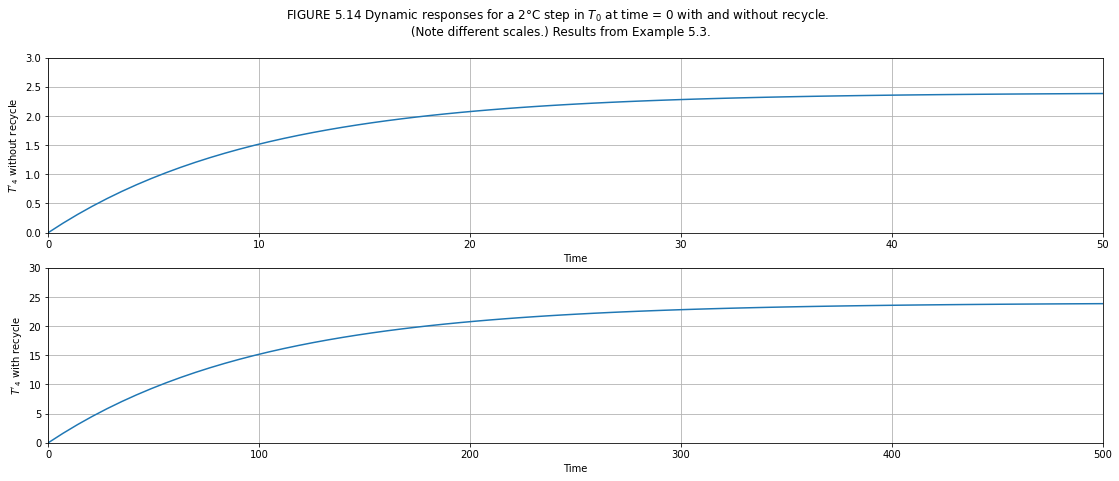

In [29]:
# Reproducing Figure 5.14 (Marlin, Chapter 5)

# Generating the outputs
eq51 = tf(12, [100, 1])
eq52 = tf(1.2, [10, 1])
out_step = []
for sys in [eq52, eq51]:
  out, time = step(sys)
  out_step.append([time, out])

# Plotting
plt.close('all')
fig_width_cm = 48
fig_height_cm = 18
plt.figure(1, figsize =(fig_width_cm /2.54, fig_height_cm /2.54))

plt.suptitle('FIGURE 5.14 Dynamic responses for a 2°C step in $T_0$ at time = 0 with and without recycle. \n (Note different scales.) Results from Example 5.3.')

for k, out in enumerate(out_step):
  plt.subplot(2, 1, k+1)
  plt.plot(out[0], 2*out[1])
  plt.grid()
  plt.xlabel('Time')
  if k+1==1:
    plt.xlim([0, 50])
    plt.ylim([0, 3])
    plt.ylabel('$T\'_{4}$ without recycle')
  else:
    plt.xlim([0, 500])
    plt.ylim([0, 30])
    plt.ylabel('$T\'_{4}$ with recycle')

/usr/local/lib/python3.7/dist-packages/control/timeresp.py:294: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  "return_x specified for a transfer function system. Internal "


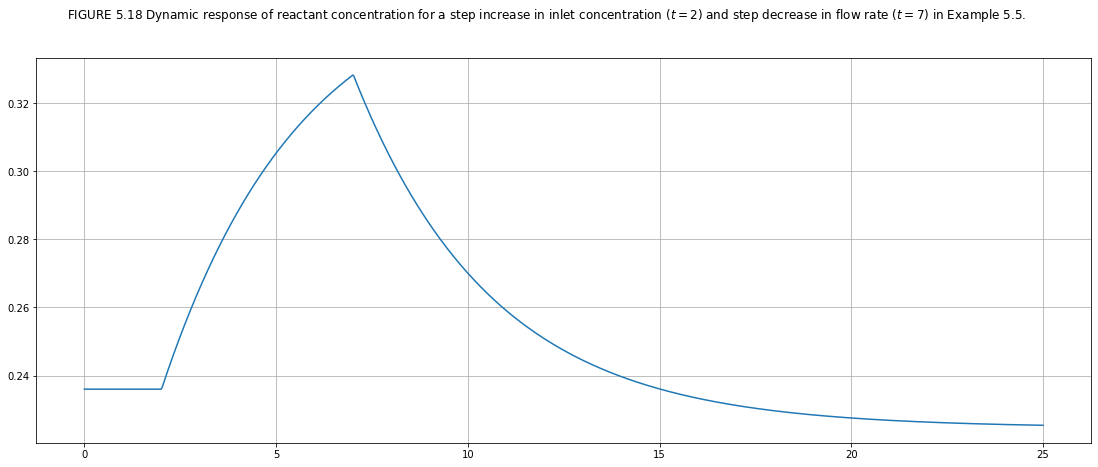

In [67]:
# Reproducing Figure 5.18 (Marlin, Chapter 5)

# Data
V = 2.1 # m3
Fs = 0.085 # m3/min
k = 0.5 # 1/[mole/m3)min]
CA0s = 0.925 # mole/m3
CAs = 0.236 # mole/m3
tauCA0 = tauF = V/(Fs+2*k*V*CAs)
KCA0 = Fs/(Fs+2*k*V*CAs)
KF = (CA0s - CAs)/(Fs+2*k*V*CAs)

# Defining the transfer functions
eq69 = tf(KCA0, [tauCA0, 1])
eq70 = tf(KF, [tauF, 1])

# Simulating the output
time = linspace(0, 25, 1001)
CA0 = F = 0*time
CA0[time>2] = 0.0925 # mole/m3
F[time>7] = -0.0085 # m3/min
out1, _, _ = lsim(eq69, CA0, time)
out2, _, _ = lsim(eq70, F, time)
out_step = [time, out1+out2+CAs]

# Plotting
plt.close('all')
fig_width_cm = 48
fig_height_cm = 18
plt.figure(1, figsize =(fig_width_cm /2.54, fig_height_cm /2.54))

plt.suptitle('FIGURE 5.18 Dynamic response of reactant concentration for a step increase in inlet concentration ($t=2$) and step decrease in flow rate ($t=7$) in Example 5.5.')

plt.plot(out_step[0], out_step[1])
plt.grid()

In [65]:
KF

1.186703410265243